Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:
Ananya Gandhi, collaborated with Kayla Kim, Natalia Forero, and Elias Finkelstein

In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 5:  Numerical Differentiation and Quadrature

## Question 1 - Fundamental Theorem of Calculus

**(a)** [10] Write a function that computes the integral of the derivative 

$$I[f] = \int^x_0 f'(s) ds$$

and returns the error from the expected calculation.  Use a second order accurate centered difference scheme and then a left-hand rule to compute the absolute error.  In this case the left-hand quadrature is

$$Q[f] = f(x_i) \Delta x$$

The function should take in $x$ values and the function $f(x)$ and return a vector of the **errors** for each value $x$ given.

In [2]:
def int_diff_error(x, f):
    # YOUR CODE HERE

    delta_x = x[1] - x[0]

    f_prime = numpy.empty(x.shape)    
    f_prime[1:-1] = (f(x[2:]) - f(x[:-2])) / (2 * delta_x)
    f_prime[0] = (f(x[1]) - f(x[0])) / delta_x    
    f_prime[-1] = (f(x[-1]) - f(x[-2])) / delta_x

    I = numpy.empty(x.shape)
    I[0] = f_prime[0] * delta_x

    for i in range(1, len(x)):
      I[i] = I[i - 1] + f_prime[i] * delta_x

    error = numpy.abs(I - (f(x) - 1))
    
    # raise NotImplementedError()
    return error

In [3]:
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
x = numpy.linspace(0.0, 1.0, 500)
print(numpy.max(int_diff_error(x, f)))
numpy.testing.assert_allclose(int_diff_error(x, f), numpy.zeros(500), atol=1e-2)
print("Successful FTC evaluation.")

0.006707859736810928
Successful FTC evaluation.


**(b)** [10] Compute the same as above except reverse the order of the operations, i.e.

$$D[f] = \frac{\text{d}}{\text{d}x} \int^x_0 f(s) ds$$


In [4]:
def diff_int_error(x, f):
    # YOUR CODE HERE

    delta_x = x[1] - x[0]

    I = numpy.empty(x.shape)
    I[0] = f(x[0]) * delta_x

    for i in range(1, len(x)):
      I[i] = I[i - 1] + f(x[i]) * delta_x

    i_prime = numpy.empty(x.shape)    
    i_prime[1:-1] = (I[2:] - I[:-2]) / (2 * delta_x)
    i_prime[0] = (I[1] - I[0]) / delta_x    
    i_prime[-1] = (I[-1] - I[-2]) / delta_x

    error = numpy.abs(i_prime - f(x))

    #raise NotImplementedError()
    
    return error

In [5]:
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
x = numpy.linspace(0.0, 1.0, 500)
print(numpy.max(diff_int_error(x, f)))
numpy.testing.assert_allclose(diff_int_error(x, f), numpy.zeros(500), atol=1e-2)
print("Successful FTC evaluation.")

0.006507137941233254
Successful FTC evaluation.


**(c)** [5] Plot the convergence rate for the number of partitions `N = [10,100,200,300,400,500]` on a `loglog` plot by computing the norm over the error given for each $N$ by using the `numpy.linalg.norm` command with `ord=numpy.infty` vs. the $\Delta x$ used.  Theorize about what you observe regarding the order of convergence.

YOUR ANSWER HERE

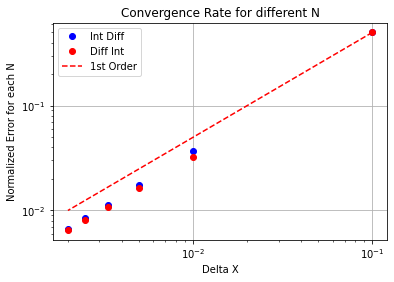

In [6]:
# YOUR CODE HERE
f = lambda x: 1.0 / (1.0 + 100.0 * x**2)
N = [10,100,200,300,400,500]
delta_x = numpy.empty(len(N))
error_int_diff = numpy.empty(len(N))
error_diff_int = numpy.empty(len(N))

for i in range(len(N)):

  x_hat = numpy.linspace(0.0, 1.0, N[i] + 1)
  delta_x[i] = x_hat[1] - x_hat[0]

  error_int_diff[i] = numpy.linalg.norm(int_diff_error(x_hat, f), ord = numpy.infty)
  error_diff_int[i] = numpy.linalg.norm(diff_int_error(x_hat, f), ord = numpy.infty)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))

plt.loglog(delta_x, error_int_diff, "bo",label="Int Diff")
plt.loglog(delta_x, error_diff_int, "ro",label="Diff Int")
plt.loglog(delta_x, order_C(delta_x[0], error_int_diff[0], 1) * delta_x**1, 'r--', label="1st Order")

plt.xlabel("Delta X")
plt.ylabel("Normalized Error for each N")
plt.title("Convergence Rate for different N")
plt.grid()
plt.legend()
plt.show()
# raise NotImplementedError()

## Question 2 - Quadrature

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.

**(a)** [2] Where do you imagine the problematic points of the integrals will be?

YOUR ANSWER HERE

The integrals will not be defined for x = 0, as this leads to 0 in the denominator. This point will be problematic. 

**(b)** [10] Write a function that computes both integrals using the  trapezoidal rule with N partitions of equal length "ignoring" the singularity at $x=0$ by setting integrands to 0.

In [7]:
def trap_1(N):
    # YOUR CODE HERE
    # raise NotImplementedError()

    f_c = lambda x: numpy.cos(x) / numpy.sqrt(x)
    f_s = lambda x: numpy.sin(x) / numpy.sqrt(x)
    x = numpy.linspace(0, 1, N+1)
    delta_x = x[1] - x[0]

    I_c = numpy.empty(N)
    I_c[0] = (f_c(x[1]) + 0) * delta_x / 2.0

    for i in range(1, N):
      I_c[i] = I_c[i - 1] + (f_c(x[i + 1]) + f_c(x[i])) * delta_x / 2.0

    I_s = numpy.empty(N)
    I_s[0] = (f_s(x[1]) + 0) * delta_x / 2.0

    for i in range(1, N):
      I_s[i] = I_s[i - 1] + (f_s(x[i + 1]) + f_s(x[i])) * delta_x / 2.0
    
    Is = I_s[-1]
    Ic = I_c[-1]
    
    return Is, Ic

In [8]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_1(200)
error = numpy.abs(Is_hat - Is)
print("Error: %s" % error)
numpy.testing.assert_allclose(error, 0.0, atol=1e-4)
print("Computed the integrals correctly using the trapezoidal rule only.")

Error: 7.324979502931761e-05
Computed the integrals correctly using the trapezoidal rule only.


**(c)** [10] A weighted Newton-Cotes quadrature rule is a modification of our version of Newton-Cotes quadrature except that we also multiply by a weighting function.  This can be useful in situations such as the one we have found ourselves in.  Consider the integral
$$
    \int^{x_{i+1}}_{x_i} \frac{f(x)}{\sqrt{x}} dx
$$
where here the weighting function is $x^{-1/2}$.  Say we wanted to approximate this integral by approximating $f(x)$ as a linear polynomial interpolant.  Find the resulting quadrature rule for approximating the weighted integral.

YOUR ANSWER HERE

$$
    p_0 = f(x_i) \\
    p_1 = \frac{f(x_{i + 1}) - f(x_i)}{x_{i + 1} - x_i} \\
    p_1(x) = \frac{f(x_{i + 1}) - f(x_i)}{x_{i + 1} - x_i} (x - x_i) + f(x_i)
$$

Apply to the integral:
$$
    I_N [f] = \int_{x_i}^{x_{i + 1}} \frac{1}{\sqrt{x}}(p_0 + p_1(x - x_i))dx \\
    I_N [f] = \sqrt{x} (2p_0 + \frac{2}{3} p_1 x - \frac{2}{3} p_1 x_i x) \Big|_{x_i}^{x_{i + 1}}
$$

If we apply our definitions for $p_0$ and $p_1$ and also set $x_i = 1$ and $x_{i + 1} = 1$

$$
    I_N [f] = \sqrt{x} (2f(x_i) + \frac{2}{3} (\frac{f(x_{i + 1}) - f(x_i)}{x_{i + 1} - x_i}) x - \frac{2}{3} (\frac{f(x_{i + 1}) - f(x_i)}{x_{i + 1} - x_i}) x_i x) \Big|_{0}^{1} \\
    I_N [f] = (2f(0) + \frac{2}{3} (\frac{f(1) - f(0)}{1 - 0})(1 - 0) - \frac{2}{3} (\frac{f(1) - f(0)}{1-0})(0)(1 - 0) \\
    I_N [f] = 2f(0) + \frac{2}{3} (f(1) - f(0)) \\
    I_N [f] = \frac{4}{3}f(0) + \frac{2}{3} f(1) \\
    I_N [f] = \frac{2}{3}(2f(0) + f(1))
$$

**(d)** Use part (c) and evaluate only the first partition $[0, \Delta x]$ using that quadrature and use trapezoid rule for the rest of the partitions.

In [9]:
def trap_wnc(N):
    # YOUR CODE HERE
    # raise NotImplementedError()

    f_c = lambda x: numpy.cos(x) / numpy.sqrt(x)
    f_s = lambda x: numpy.sin(x) / numpy.sqrt(x)
    x = numpy.linspace(0, 1, N+1)
    delta_x = x[1] - x[0]

    I_c = numpy.empty(N)

    I_c[0] = delta_x * 2.0 / 3.0 * f_c(x[1]) 

    I_s = numpy.empty(N)
    I_s[0] = delta_x * 2.0 / 3.0 * f_s(x[1])

    for i in range(1, N):
      I_c[i] = I_c[i - 1] + (f_c(x[i + 1]) + f_c(x[i])) * delta_x / 2.0
      I_s[i] = I_s[i - 1] + (f_s(x[i + 1]) + f_s(x[i])) * delta_x / 2.0
    
    Is = I_s[-1]
    Ic = I_c[-1]

    
    return Is, Ic

In [10]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_wnc(200)
error = numpy.abs(Is_hat - Is)
print("Error: %s" % error)
numpy.testing.assert_allclose(error, 0.0, atol=1e-4)
print("Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.")

Error: 1.4324475453353358e-05
Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.


**(e)** [5] Do a change of variables $x = t^2$ and evaluate each integral using the trapezoidal rule for the entire domain.

In [11]:
def trap_transformed(N):
    # YOUR CODE HERE
    # raise NotImplementedError()

    f_c = lambda t: 2 * numpy.cos(t**2) 
    f_s = lambda t: 2 * numpy.sin(t**2) 
    x = numpy.linspace(0, 1, N+1)
    delta_x = x[1] - x[0]

    I_c = numpy.empty(N)

    I_c[0] = (f_c(x[1]) + f_c(x[0])) * delta_x / 2

    I_s = numpy.empty(N)
    I_s[0] = (f_s(x[1]) + f_s(x[0])) * delta_x / 2

    for i in range(1, N):
      I_c[i] = I_c[i - 1] + (f_c(x[i + 1]) + f_c(x[i])) * delta_x / 2.0
      I_s[i] = I_s[i - 1] + (f_s(x[i + 1]) + f_s(x[i])) * delta_x / 2.0
    
    Is = I_s[-1]
    Ic = I_c[-1]
    
    return Is, Ic

In [12]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = trap_transformed(200)
error = numpy.abs(Is_hat - Is)
print("Error: %s" % error)
numpy.testing.assert_allclose(error, 0.0, atol=1e-5)
print("Computed the integrals correctly using the trapezoidal rule.")

Error: 4.502544250550855e-06
Computed the integrals correctly using the trapezoidal rule.


**(f)** [5] Do the same as in part (e) again using the transformation $x=t^2$ but use 3-point Gauss-Legendre quadrature for the approximation to the integral.

In [13]:
def gauss_legendre_3(N):
    # YOUR CODE HERE
    # raise NotImplementedError()
    f_c = lambda t: 2 * numpy.cos(t**2) 
    f_s = lambda t: 2 * numpy.sin(t**2) 
    x = numpy.linspace(0, 1, N+1)
    delta_x = x[1] - x[0]

    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi = [-numpy.sqrt(3/5), 0, numpy.sqrt(3/5)]
    w = [5/9, 8/9, 5/9] 

    Is = 0.0
    Ic = 0.0
    for i in range(0, N):
        for k in range(len(xi)):
            Is += f_s(xi_map(x[i], x[i+1], xi[k])) * w[k]
            Ic += f_c(xi_map(x[i], x[i+1], xi[k])) * w[k]

    Is *= delta_x / 2.0
    Ic *= delta_x / 2.0
    
    return Is, Ic

In [14]:
import scipy.special
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)
Is_hat, Ic_hat = gauss_legendre_3(10)
error = numpy.abs(Is_hat - Is)
print("Error: %s" % error)
numpy.testing.assert_allclose(error, 0.0, atol=1e-10)
print("Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.")

Error: 8.57062198988956e-11
Computed the integrals correctly using the trapezoidal and Newton-Cotes rules.


**(g)** [5] Check the order of accuracy for each of the methods above and plot these on a `loglog` plot with appropriate reference lines to indicate the order of each.

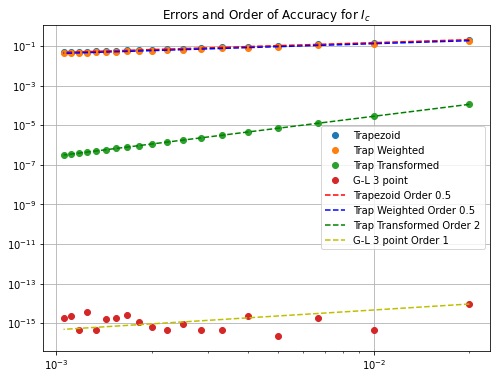

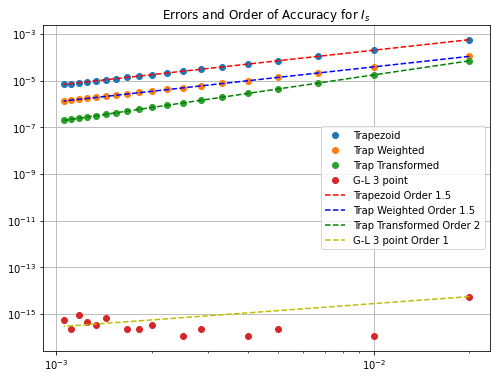

In [15]:
# YOUR CODE HERE
# raise NotImplementedError()

# Compute the error as a function of delta_x for each method

num_partitions = range(50, 1000, 50)
delta_x = numpy.empty(len(num_partitions))

# trap_1 function
error_trap_s = numpy.empty(len(num_partitions))
error_trap_c = numpy.empty(len(num_partitions))

# trap weighted newton cotes
error_wnc_s = numpy.empty(len(num_partitions))
error_wnc_c = numpy.empty(len(num_partitions))

# trap transformed
error_transformed_s = numpy.empty(len(num_partitions))
error_transformed_c = numpy.empty(len(num_partitions))

# gauss legendre
error_gauss_s = numpy.empty(len(num_partitions))
error_gauss_c = numpy.empty(len(num_partitions))

# real values
Is, Ic = scipy.special.fresnel(numpy.sqrt(2.0 / numpy.pi))
Is *= numpy.sqrt(2.0 * numpy.pi)
Ic *= numpy.sqrt(2.0 * numpy.pi)

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N + 1)
    delta_x[j] = x_hat[1] - x_hat[0]

    # compute errors for trap_1 method
    Is_hat, Ic_hat = trap_1(N)
    error_trap_s[j] = numpy.abs(Is_hat - Is)
    error_trap_c[j] = numpy.abs(Ic_hat - Ic)

    # compute errors for trap_wnc method
    Is_hat, Ic_hat = trap_wnc(N)
    error_wnc_s[j] = numpy.abs(Is_hat - Is)
    error_wnc_c[j] = numpy.abs(Ic_hat - Ic)

    # compute errors for trap transformed method
    Is_hat, Ic_hat = trap_transformed(N)
    error_transformed_s[j] = numpy.abs(Is_hat - Is)
    error_transformed_c[j] = numpy.abs(Ic_hat - Ic)

    # compute errors for gauss legendre method
    Is_hat, Ic_hat = gauss_legendre_3(N)
    error_gauss_s[j] = numpy.abs(Is_hat - Is)
    error_gauss_c[j] = numpy.abs(Ic_hat - Ic)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))    

# plot for I_c
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error_trap_c, 'o', label="Trapezoid")
axes.loglog(delta_x, error_wnc_c, 'o', label="Trap Weighted")
axes.loglog(delta_x, error_transformed_c, 'o', label="Trap Transformed")
axes.loglog(delta_x, error_gauss_c, 'o', label="G-L 3 point")

axes.loglog(delta_x, order_C(delta_x[0], error_trap_c[0], 0.5) * delta_x**0.5, 'r--', label="Trapezoid Order 0.5" )
axes.loglog(delta_x, order_C(delta_x[0], error_wnc_c[0], 0.5) * delta_x**0.5, 'b--', label="Trap Weighted Order 0.5")
axes.loglog(delta_x, order_C(delta_x[0], error_transformed_c[0], 2.0) * delta_x**2.0, 'g--', label="Trap Transformed Order 2")
axes.loglog(delta_x, order_C(delta_x[0], error_gauss_c[0], 1) * delta_x**1.0, 'y--', label="G-L 3 point Order 1")

plt.title("Errors and Order of Accuracy for $I_c$")
plt.legend()
plt.grid()
plt.show()

# plot for I_s
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)

axes.loglog(delta_x, error_trap_s, 'o', label="Trapezoid")
axes.loglog(delta_x, error_wnc_s, 'o', label="Trap Weighted")
axes.loglog(delta_x, error_transformed_s, 'o', label="Trap Transformed")
axes.loglog(delta_x, error_gauss_s, 'o', label="G-L 3 point")

axes.loglog(delta_x, order_C(delta_x[0], error_trap_s[0], 1.5) * delta_x**1.5, 'r--', label="Trapezoid Order 1.5" )
axes.loglog(delta_x, order_C(delta_x[0], error_wnc_s[0], 1.5) * delta_x**1.5, 'b--', label="Trap Weighted Order 1.5")
axes.loglog(delta_x, order_C(delta_x[0], error_transformed_s[0], 2.0) * delta_x**2.0, 'g--', label="Trap Transformed Order 2")
axes.loglog(delta_x, order_C(delta_x[0], error_gauss_s[0], 1) * delta_x**1, 'y--', label="G-L 3 point Order 1")

plt.title("Errors and Order of Accuracy for $I_s$")
plt.legend()
plt.grid()
plt.show()

**(h)** [3] Comment on the results of this question and the vast differences in convergence rates even between the two integrations (why is $I_c$ less accurate than $I_s$).

YOUR ANSWER HERE

$I_s$ has a higher order of accuracy, closer to orders of 1.5 and 2, while $I_c$ has a lower order of accuracy closer to 0.5. The trapezoid method is consistent among both integrations. $I_c$ is less accurate bcause it has a bigger singularity at the beginning, because $\cos 0 = 1$.

## Question 3

We can often reformulate finite difference approximations as matrix-vector products.  For the following assume that the data considered are equi-spaced points $(x_i, y_i)$, i.e. $\Delta x$ is uniform.

**(a)** [10] Derive the forward and backward second order finite difference approximations to the second derivative using the method of your choice.

YOUR ANSWER HERE

By the Taylor Series Expansion:
$$
    f(x_{n + 1}) = f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + O(\Delta x^4) \\ 
    f(x_{n + 2}) = f(x_n) + 2\Delta x f'(x_n) + \frac{4\Delta x^2}{2!} f''(x_n) + \frac{8\Delta x^3}{3!} f'''(x_n) + O(\Delta x^4) \\ 
    f(x_{n + 3}) = f(x_n) + 3\Delta x f'(x_n) + \frac{9\Delta x^2}{2!} f''(x_n) + \frac{27\Delta x^3}{3!} f'''(x_n) + O(\Delta x^4) \\ 
$$

To get rid of the $f'(x)$ and $f'''(x)$ terms, we have to solve the equation:

$$\begin{bmatrix}
    1 & 2 & 3 \\
    1 & 8 & 27 \\
\end{bmatrix} \begin{bmatrix} 
    x_1 \\
    x_2 \\
    x_3 \\
\end{bmatrix}
= 0
$$

We get $\vec{x} = 
\begin{bmatrix}
    5 \\
    -4 \\
    1
\end{bmatrix}$

Now, we know that we can solve for $f''(x)$ by adding $5f(x_{n + 1}) - 4f(x_{n + 2}) + 1f(x_{n + 3})$. 

$$ 
    5f(x_{n + 1}) - 4f(x_{n + 2}) + f(x_{n + 3}) = 5\left(f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + O(\Delta x^4) \right) - 4 \left(f(x_n) + 2\Delta x f'(x_n) + \frac{4\Delta x^2}{2!} f''(x_n) + \frac{8\Delta x^3}{3!} f'''(x_n) + O(\Delta x^4) \right) + \left(f(x_n) + 3\Delta x f'(x_n) + \frac{9\Delta x^2}{2!} f''(x_n) + \frac{27\Delta x^3}{3!} f'''(x_n) + O(\Delta x^4) \right) \\
    5f(x_{n + 1}) - 4f(x_{n + 2}) + f(x_{n + 3}) = 2f(x_n) - \frac{2\Delta x^2}{2!} f''(x_n) \\ 
    5f(x_{n + 1}) - 4f(x_{n + 2}) + f(x_{n + 3}) = 2f(x_n) - \Delta x^2 f''(x_n) \\
    f''(x_n) = \frac{2f(x_n) - 5f(x_{n + 1}) + 4f(x_{n + 2}) - f(x_{n + 3}) }{\Delta x^2}  
$$

This gives us the forward second order finite difference approximation. 

We can derive the backward version from this as well:
$$
    f''(x_n) = \frac{2f(x_n) - 5f(x_{n - 1}) + 4f(x_{n - 2}) - f(x_{n - 3}) }{\Delta x^2} 
$$

**(b)** [10] Using a second order centered finite difference approximation to the second derivative and the appropriate second order forward and backward difference schemes at the edges of the domain find the matrix $D$ such that multiplying a vector of $y$ values would lead to a second order approximation of the derivative for the given data.  In other words for $y_i = f(x_i)$
$$
    f''(x) \approx D y.
$$

YOUR ANSWER HERE

To calculate the centered finite difference approximation, we can add $f(x_{n + 1})$ and $f(x_{n - 1})$ to get:

$$
    f(x_{n + 1}) = f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + O(\Delta x^4) \\ 
    f(x_{n - 1}) = f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + O(\Delta x^4) \\ 
    f(x_{n + 1}) + f(x_{n - 1}) = 2f(x_n) + \Delta x^2 f''(x_n) + O(\Delta x^4) \\ 
    f''(x_n) = \frac{f(x_{n - 1}) - 2f(x_n) + f(x_{n + 1}) }{\Delta x^2} 
$$

We get the matrix D such that:
$$\frac{1}{\Delta x^2} \begin{bmatrix}
    2 & -5 & 4 & -1 & ... & 0 & 0 & 0 & 0\\
    1 & -2 & 1 & 0 & ... & 0 & 0 & 0 & 0\\
    0 & 1 & -2 & 1 & ... & 0 & 0 & 0 & 0\\
    0 & 0 & 1 & -2 & ... & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & ... & 1 & -2 & 1 & 0\\
    0 & 0 & 0 & 0 & ... & 0 & 1 & -2 & 1\\
    0 & 0 & 0 & 0 & ... & -1 & 4 & -5 & 2\\
\end{bmatrix} \begin{bmatrix}
    f(x_0) \\
    f(x_1) \\
    f(x_2) \\ 
    f(x_3) \\
    f(x_4) \\
    ... \\ 
    f(x_i) \\
\end{bmatrix}$$

So we end up with 
$$D = \frac{1}{\Delta x^2} \begin{bmatrix}
    2 & -5 & 4 & -1 & ... & 0 & 0 & 0 & 0\\
    1 & -2 & 1 & 0 & ... & 0 & 0 & 0 & 0\\
    0 & 1 & -2 & 1 & ... & 0 & 0 & 0 & 0\\
    0 & 0 & 1 & -2 & ... & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & ... & 1 & -2 & 1 & 0\\
    0 & 0 & 0 & 0 & ... & 0 & 1 & -2 & 1\\
    0 & 0 & 0 & 0 & ... & -1 & 4 & -5 & 2\\
\end{bmatrix}$$YOUR ANSWER HERE

**(c)** [10] Write a function that takes in the number of data points $N$ and returns the matrix $D$.  Here assume we are on the interval $[-1, 1]$.  Note that inside your function 
$$
    \Delta x = \frac{2}{N - 1}
$$
to match the `linspace` command.

Beyond being convenient (once you construct the matrix you can apply it to any set of data) this operation is much faster than using loops.  *Hint:* The command `numpy.diag` may be extremely helpful.

In [16]:
def diff_matrix(N):
    # YOUR CODE HERE
    # raise NotImplementedError()

    delta_x = 2 / (N - 1)
    
    D = numpy.zeros((N, N))
    D += numpy.diag(numpy.ones(N) * -2, 0)
    D += numpy.diag(numpy.ones(N - 1), 1)
    D += numpy.diag(numpy.ones(N - 1), -1)
    D[0, :4] = [2, -5, 4, -1]
    D[-1, -4:] = [-1, 4, -5, 2]

    D *= 1 / delta_x **2
    
    return D

In [17]:
N = 200
x = numpy.linspace(-1, 1, N)
y = numpy.sin(x) * numpy.cos(x)
numpy.testing.assert_allclose(numpy.dot(diff_matrix(N), y), -4.0 * numpy.sin(x) * numpy.cos(x), rtol=1e-2)
print("Success!")

Success!


**(c)** [5] Suppose instead that we did not know the vector $f(x_i) = y_i$ but instead knew the value of second derivative at these points.  If we wanted to find the vector $y$ what kind of problem would we have to solve?  What is the continuous analog of this problem and what additional information would we need?

YOUR ANSWER HERE

If we had the value of the second derivative at these points, we would need to solve a system of linear equations involving derivatives to find the vector y. Because we have the second derivative and it is related to the variable y, this is similar to a second order ordinary differential equation, which requires knowing boundary points and solving an initial value problem to get the final solution. If this was continuous, we would be solving an ODE and need the Initial Value and Boundary Values. 